<a href="https://colab.research.google.com/github/angel870326/NTU_Data_Mining/blob/main/hw1_nbc_eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NB Classification & Evaluation
**NTU Data Mining HW1**

*SYW 2022.03.26*


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [ ]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Entropy

In [ ]:
dataset_entropy = pd.read_csv('/content/gdrive/Shareddrives/資料探勘第4組/HW1/heart_entropy.csv')
dataset_entropy

,Unnamed: 0,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0,55~70,1,3,144~200,126~244,1,0,148~169,0,1.8~2.4,0,0,1,1
1,1,29~54,1,2,108~142,246~409,0,1,170~202,0,2.5~6.2,0,0,2,1
2,2,29~54,0,1,108~142,126~244,0,0,170~202,0,0.8~1.6,2,0,2,1
3,3,55~70,1,1,108~142,126~244,0,1,170~202,0,0.8~1.6,2,0,2,1
4,4,55~70,0,0,108~142,246~409,0,1,148~169,1,0.0~0.7,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,55~70,0,0,108~142,126~244,0,1,114~147,1,0.0~0.7,1,0,3,0
299,299,29~54,1,3,108~142,246~409,0,1,114~147,0,0.8~1.6,1,0,3,0
300,300,55~70,1,0,144~200,126~244,1,1,114~147,0,2.5~6.2,1,2,3,0
301,301,55~70,1,0,108~142,126~244,0,1,114~147,1,0.8~1.6,1,1,3,0


In [ ]:
x_entropy = dataset_entropy.iloc[:, 1:13].values
y_entropy = dataset_entropy.iloc[:, -1].values

In [ ]:
# Encode text to label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
text_list = [0,3,4,7,9]
for i in text_list:
  x_entropy[:,i] = le.fit_transform(x_entropy[:,i])
x_entropy

array([[1, 1, 3, ..., 2, 0, 0],
       [0, 1, 2, ..., 3, 0, 0],
       [0, 0, 1, ..., 1, 2, 0],
       ...,
       [1, 1, 0, ..., 3, 1, 2],
       [1, 1, 0, ..., 1, 1, 1],
       [1, 0, 1, ..., 0, 1, 1]], dtype=object)

In [ ]:
# Training & testing set
from sklearn.model_selection import train_test_split
x_entropy_train, x_entropy_test, y_entropy_train, y_entropy_test = train_test_split(x_entropy, y_entropy, test_size = 0.20, random_state = 0)

In [ ]:
# Training
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_entropy_train, y_entropy_train)

GaussianNB()

In [ ]:
# Testing
y_entropy_pred  =  classifier.predict(x_entropy_test)
y_entropy_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
# actual value
y_entropy_test

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

In [ ]:
# Evaluation
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score
cm_entropy = confusion_matrix(y_entropy_test, y_entropy_pred)
tn, fp, fn, tp = cm_entropy.ravel()

rc_entropy = recall_score(y_entropy_test,y_entropy_pred)
sc_entropy = tn / (tn+fp)
pc_entropy = precision_score(y_entropy_test,y_entropy_pred)
ac_entropy = accuracy_score(y_entropy_test,y_entropy_pred)
f1_entropy = f1_score(y_entropy_test,y_entropy_pred)

print("Confusion matrix ([tn,fp],[fn,tp]): \n", cm_entropy)
print("Recall: ", rc_entropy)
print("Specificity: ", sc_entropy)
print("Precision: ", pc_entropy)
print("Accuracy: ", ac_entropy)
print("F1: ", f1_entropy)

Confusion matrix ([tn,fp],[fn,tp]): 
 [[19  8]
 [ 5 29]]
Recall:  0.8529411764705882
Specificity:  0.7037037037037037
Precision:  0.7837837837837838
Accuracy:  0.7868852459016393
F1:  0.8169014084507041


## PCA

In [ ]:
dataset_pca = pd.read_csv('/content/gdrive/Shareddrives/資料探勘第4組/HW1/heart_PCA.csv')
dataset_pca

,Principle_Component_One,Principle_Component_Two,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,-1.267716,-0.082358,1,3,1,0,0,0,0,1,1
1,0.932350,-0.070433,1,2,0,1,0,0,0,2,1
2,1.419900,-0.389838,0,1,0,0,0,2,0,2,1
3,0.920091,0.263924,1,1,0,1,0,2,0,2,1
4,0.047331,1.591873,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
298,-0.568496,-0.172939,0,0,0,1,1,1,0,3,0
299,0.510919,-0.812798,1,3,0,1,0,1,0,3,0
300,-2.014465,-1.067526,1,0,1,1,0,1,2,3,0
301,-0.414562,-2.323948,1,0,0,1,1,1,1,3,0


In [ ]:
x_pca = dataset_pca.iloc[:, 0:9].values
y_pca = dataset_pca.iloc[:, -1].values

In [ ]:
# Training & testing set
x_pca_train, x_pca_test, y_pca_train, y_pca_test = train_test_split(x_pca, y_pca, test_size = 0.20, random_state = 0)

In [ ]:
# Training
classifier.fit(x_pca_train, y_pca_train)
# Testing
y_pca_pred  =  classifier.predict(x_pca_test)
y_pca_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
# actual value
y_pca_test

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

In [ ]:
# Evaluation
cm_pca = confusion_matrix(y_pca_test, y_pca_pred)
tn, fp, fn, tp = cm_pca.ravel()

rc_pca = recall_score(y_pca_test,y_pca_pred)
sc_pca = tn / (tn+fp)
pc_pca = precision_score(y_pca_test,y_pca_pred)
ac_pca = accuracy_score(y_pca_test,y_pca_pred)
f1_pca = f1_score(y_pca_test,y_pca_pred)

print("Confusion matrix ([tn,fp],[fn,tp]): \n", cm_pca)
print("Recall: ", rc_pca)
print("Specificity: ", sc_pca)
print("Precision: ", pc_pca)
print("Accuracy: ", ac_pca)
print("F1: ", f1_pca)

Confusion matrix ([tn,fp],[fn,tp]): 
 [[19  8]
 [ 6 28]]
Recall:  0.8235294117647058
Specificity:  0.7037037037037037
Precision:  0.7777777777777778
Accuracy:  0.7704918032786885
F1:  0.7999999999999999


# Comparison

## Confusion Matrix

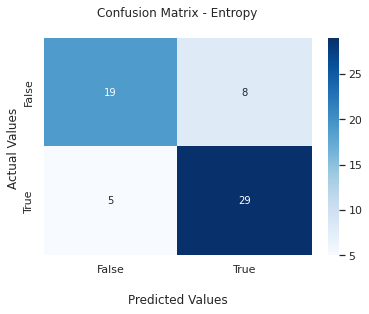

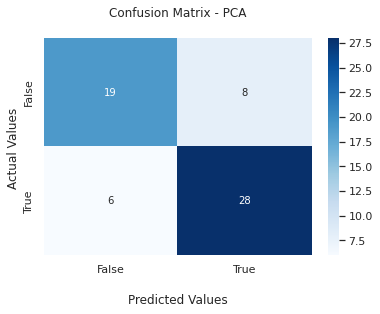

In [ ]:
import seaborn as sns

# Entropy
entropy = sns.heatmap(cm_entropy, annot=True, cmap='Blues')
entropy.set_title('Confusion Matrix - Entropy\n');
entropy.set_xlabel('\nPredicted Values')
entropy.set_ylabel('Actual Values ');
entropy.xaxis.set_ticklabels(['False','True'])
entropy.yaxis.set_ticklabels(['False','True'])
plt.show()

# PCA
pca = sns.heatmap(cm_pca, annot=True, cmap='Blues')
pca.set_title('Confusion Matrix - PCA\n');
pca.set_xlabel('\nPredicted Values')
pca.set_ylabel('Actual Values ');
pca.xaxis.set_ticklabels(['False','True'])
pca.yaxis.set_ticklabels(['False','True'])
plt.show()

##Scores

In [ ]:
evaluation = [
    [rc_entropy, rc_pca],
    [sc_entropy, sc_pca],
    [pc_entropy, pc_pca],
    [ac_entropy, ac_pca],
    [f1_entropy, f1_pca]
]
 
evaluation_df = pd.DataFrame(evaluation)
evaluation_df.index = ["Recall", "Specificity", "Precision", "Accuracy", "F1"]  
evaluation_df.columns = ["Entropy", "PCA"]
evaluation_df


,Entropy,PCA
Recall,0.852941,0.823529
Specificity,0.703704,0.703704
Precision,0.783784,0.777778
Accuracy,0.786885,0.770492
F1,0.816901,0.800000
